<a href="https://colab.research.google.com/github/dhakshitham/guide/blob/main/g1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving labelled_validation_data.csv to labelled_validation_data (4).csv
Dataset Loaded Successfully!
    timestamp  processId  threadId  parentProcessId  userId  mountNamespace  \
0  124.439221        381       381                1     101      4026532232   
1  124.439751        378       378                1     100      4026532231   
2  124.439958          1         1                0       0      4026531840   
3  124.440007          1         1                0       0      4026531840   
4  124.440037          1         1                0       0      4026531840   

       processName         hostName  eventId           eventName  \
0  systemd-resolve  ip-10-100-1-129       41              socket   
1  systemd-network  ip-10-100-1-129       41              socket   
2          systemd  ip-10-100-1-129     1005  security_file_open   
3          systemd  ip-10-100-1-129      257              openat   
4          systemd  ip-10-100-1-129        5               fstat   

               

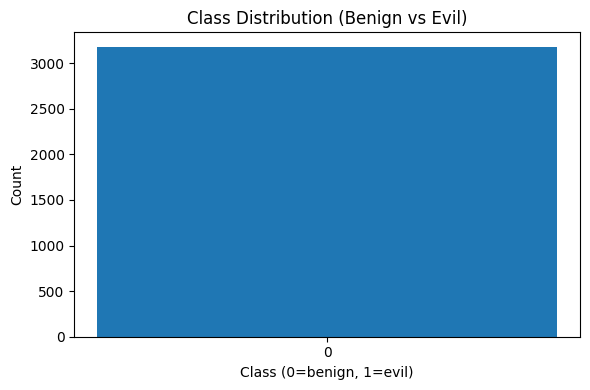

Accuracy: 1.0
Confusion Matrix:
 [[636]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


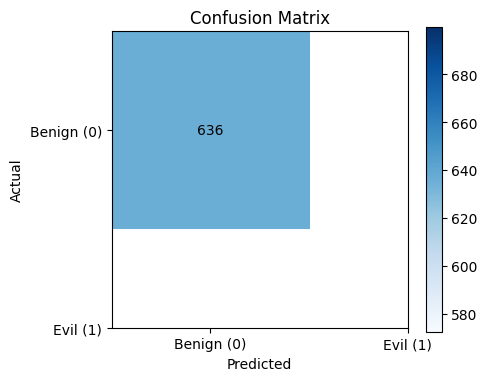

ROC Curve and AUC cannot be calculated for a dataset with only one class in the test set.
Unique classes in y_test: [0]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Output Saved & Downloaded: malware_predictions_output.csv


In [5]:
#===========================
# INSTALL PACKAGES
#===========================
!pip install scikit-learn pandas matplotlib openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from google.colab import files

#===========================
# 1. UPLOAD MALWARE DATASET
#===========================
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# If file is Excel
df = pd.read_csv(file_name)

print("Dataset Loaded Successfully!")
print(df.head())
print(df.columns)

#===========================
# 2. BAR GRAPH — CLASS COUNT
#===========================
label_counts = df["evil"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(label_counts.index.astype(str), label_counts.values)
plt.title("Class Distribution (Benign vs Evil)")
plt.xlabel("Class (0=benign, 1=evil)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#===========================
# 3. SPLIT DATA
#===========================
X = df.drop(columns=["evil", "hash"], errors="ignore")

# Drop non-numeric (object type) columns that cannot be scaled
X = X.select_dtypes(exclude=['object'])

y = df["evil"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#===========================
# 4. SCALING (IMPORTANT)
#===========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#===========================
# 5. TRAIN MODEL
#===========================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

#===========================
# 6. ACCURACY + PREDICTIONS
#===========================
pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, pred)
print("Accuracy:", acc)

#===========================
# 7. CONFUSION MATRIX
#===========================
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()

plt.xticks([0,1], ["Benign (0)", "Evil (1)"])
plt.yticks([0,1], ["Benign (0)", "Evil (1)"])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j], ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

#===========================
# 8. ROC CURVE
#===========================
if len(y_test.unique()) < 2:
    print("ROC Curve and AUC cannot be calculated for a dataset with only one class in the test set.")
    print(f"Unique classes in y_test: {y_test.unique()}")
else:
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
    plt.plot([0,1], [0,1], '--')

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve — Evil Detection")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("ROC AUC Score:", roc_auc)

#===========================
# 9. SAVE OUTPUT FILE
#===========================
output = pd.DataFrame({
    "True_Label": y_test,
    "Predicted": pred
})

output_file = "malware_predictions_output.csv"
output.to_csv(output_file, index=False)

files.download(output_file)

print("Output Saved & Downloaded:", output_file)